# 1a. Planetary Coverage

In [1]:
%matplotlib widget

import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

from planetary_coverage import TourConfig
from planetary_coverage.ticks import AU, au_ticks, date_ticks, km_ticks
import planetary_coverage as pc

# NOTE: env variables are also supported by planetary_coverage
KERNEL_DIR=Path("../data/kernels/kernels")

## Pulling MK

In [2]:
from planetary_coverage import ESA_MK

ESA_MK

<EsaMetakernelsCollection> 16 missions:
 - BEPICOLOMBO / MPO / BEPICOLOMBO MPO / MERCURY PLANETARY ORBITER / MTM / BEPICOLOMBO MTM / MERCURY TRANSFER MODULE / MMO / BEPICOLOMBO MMO / MERCURY MAGNETOSPHERIC ORBITER
 - ENVISION
 - COMET-INTERCEPTOR
 - EXOMARS2016 / TGO / EXOMARS 2016 TGO / TRACE GAS ORBITER / EDM / EXOMARS 2016 EDM / EDL DEMONSTRATOR MODULE
 - EXOMARSRSP / RM / EXM RSP RM / EXM ROVER / EXOMARS ROVER / SP / EXM RSP SP / EXM SURFACE PLATFORM / EXOMARS SP / CM / EXM RSP SCC / EXM SPACECRAFT COMPOSITE / EXOMARS SCC
 - GAIA
 - HERA
 - HUYGENS / CASP / CASSINI PROBE / HUYGENS PROBE
 - INTEGRAL
 - JUICE
 - JWST
 - MARS-EXPRESS / MEX / MARS EXPRESS / BEAGLE2 / BEAGLE 2 / BEAGLE-2
 - ROSETTA / PHILAE
 - SMART-1 / S1 / SM1 / SMART1
 - SOLAR-ORBITER / SOLO / SOLAR ORBITER
 - VENUS-EXPRESS / VEX / VENUS EXPRESS

## JUICE to Jupyter distance

In [3]:
tour = TourConfig(
    kernels_dir=KERNEL_DIR, 
    mk='5.1 150lb_23_1',
    version='v422',
    spacecraft='JUICE',
    target='JUPITER',
)

tour

<TourConfig> Spacecraft: JUICE | Target: JUPITER | Metakernel: juice_crema_5_1_150lb_23_1_v422_20230130_002 | SKD version: v422_20230130_002

In [4]:
traj = tour['2023-04-06': '2031-06-01': '1 day']

traj

<SpacecraftTrajectory> Observer: JUICE | Target: JUPITER
 - UTC start time: 2023-04-06T00:00:00.000
 - UTC stop time: 2031-06-01T00:00:00.000
 - Nb of pts: 2,979

Text(0.5, 1.0, 'Juice distance to Jupiter')

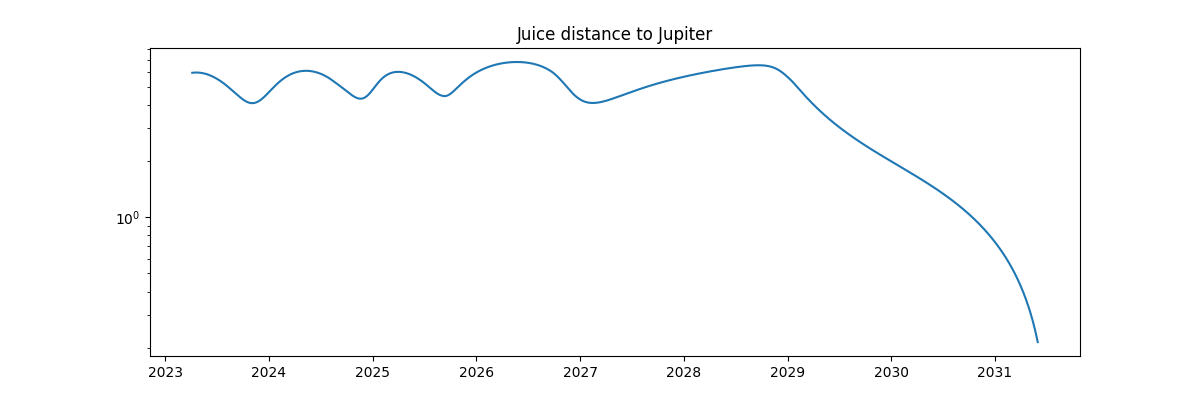

In [7]:
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot()

ax.plot(traj.utc, traj.dist * 6.68459e-9)

ax.set_yscale('log')

ax.xaxis.set_major_formatter(date_ticks)
# ax.yaxis.set_major_formatter(km_ticks)

ax.set_title('Juice distance to Jupiter')

## JUICE / RADEM PSD to Earth distance

```sh
      Name                         NAIF ID
     ---------------------        ---------
      JUICE_RADEM_ESD              -28086
      JUICE_RADEM_PSD              -28087
      JUICE_RADEM_HISD             -28088
      JUICE_RADEM_DD_NN*           -28089NN*
      JUICE_RADEM_BKGD_N**         -28089NN*

   * NN is the sector number and ranges from 00 to 27.
   ** N is the background sector and ranges from 1 to 3.
```

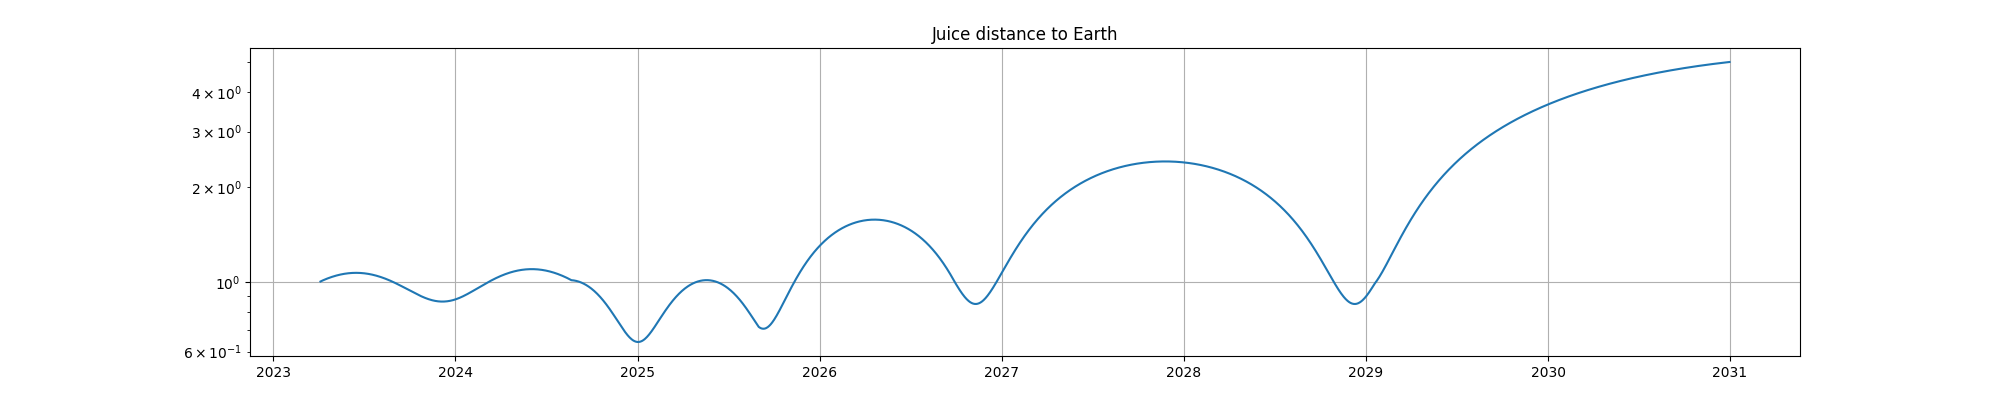

In [38]:
tour = TourConfig(
    kernels_dir=KERNEL_DIR,
    mk='5.1 150lb_23_1',
    version='v451',
    spacecraft='JUICE',
    target='SUN',
    instrument='JUICE_RADEM_PSD',
)   
traj = tour['2023-04-06': '2030-12-31': '1 day']

fig = plt.figure(figsize=(20, 4))
ax = fig.add_subplot()

ax.plot(traj.utc, traj.dist * 6.68459e-9)

ax.set_yscale('log')

ax.set_title('Juice distance to Earth')
ax.grid(True)

<InstrumentTrajectory> Observer: JUICE_RADEM_PSD | Target: SUN
 - UTC start time: 2023-04-06T00:00:00.000
 - UTC stop time: 2030-12-31T00:00:00.000
 - Nb of pts: 2,827

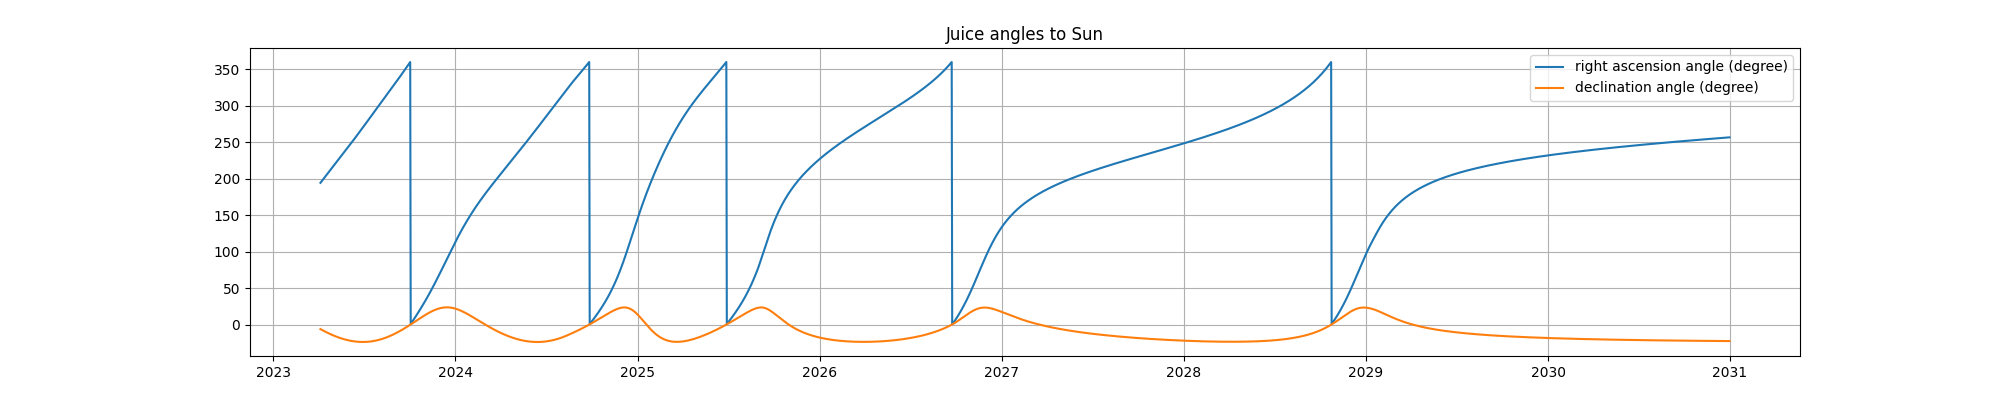

In [36]:
tour = TourConfig(
    kernels_dir=KERNEL_DIR,
    mk='5.1 150lb_23_1',
    version='v451',
    spacecraft='JUICE',
    target='SUN',
    instrument='JUICE_RADEM_PSD',
)   
traj = tour['2023-04-06': '2030-12-31': '1 day']

fig = plt.figure(figsize=(20, 4))
ax = fig.add_subplot()

ax.plot(traj.utc, traj.ra, label="right ascension angle (degree)")
ax.plot(traj.utc, traj.dec, label="declination angle (degree)")
# ax.plot(traj.utc, traj.dist, label="distance to Earth")
# ax.set_yscale('log')

ax.legend()

ax.set_title('Juice angles to Sun')
ax.grid(True)
traj

In [37]:
import pandas as pd

# create dataframe with traj.utc and traj.dist
df = pd.DataFrame({'time': traj.utc, 'ra': traj.ra, 'dec': traj.dec})
df.to_csv('juice_angles_to_sun.csv', index=False)

## Visualization

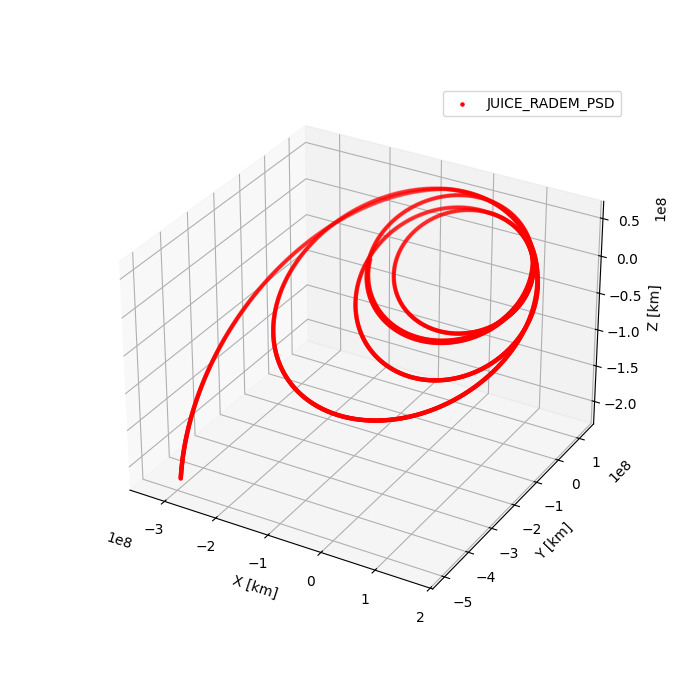

In [89]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Funkcja konwertująca rektascensję (RA), deklinację (Dec) i dystans na współrzędne kartezjańskie
def spherical_to_cartesian(ra, dec, distance):
    # Konwersja kątów na radiany
    ra_rad = np.radians(ra)
    dec_rad = np.radians(dec)
    
    # Współrzędne kartezjańskie
    x = distance * np.cos(dec_rad) * np.cos(ra_rad)
    y = distance * np.cos(dec_rad) * np.sin(ra_rad)
    z = distance * np.sin(dec_rad)
    
    return x, y, z

# Dane: listy rektascensji, deklinacji i dystansów
N = 10000000000000
ras = traj.ra[:N]
decs = traj.dec[:N]
distances = traj.dist[:N]

# Konwersja na współrzędne kartezjańskie
xs, ys, zs = [], [], []
for ra, dec, distance in zip(ras, decs, distances):
    x, y, z = spherical_to_cartesian(ra, dec, distance)
    xs.append(x)
    ys.append(y)
    zs.append(z)

# Tworzenie wykresu 3D
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, color='r', marker='.', label='JUICE_RADEM_PSD')

# Etykiety i legenda
ax.set_xlabel('X [km]')
ax.set_ylabel('Y [km]')
ax.set_zlabel('Z [km]')
ax.legend()

## Visualization with quaternions

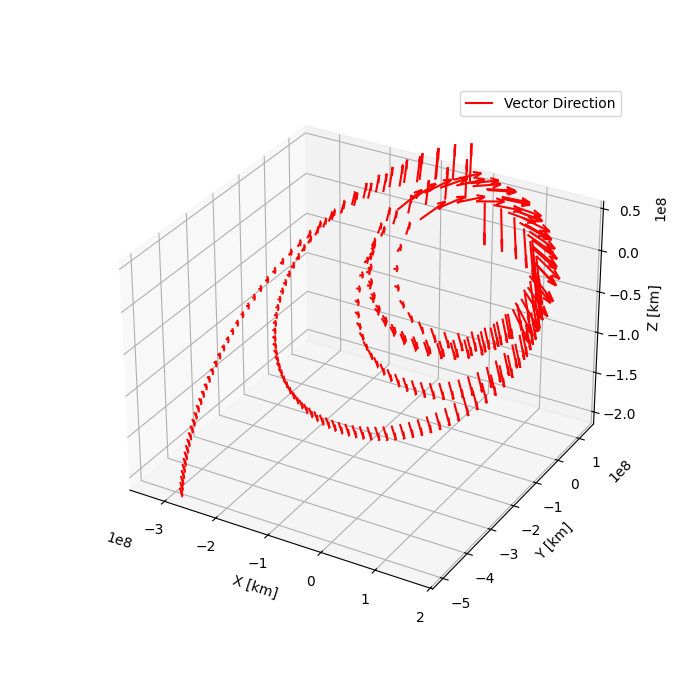

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to convert spherical (RA, Dec, distance) to Cartesian coordinates
def spherical_to_cartesian(ra, dec, distance):
    ra_rad = np.radians(ra)
    dec_rad = np.radians(dec)
    x = distance * np.cos(dec_rad) * np.cos(ra_rad)
    y = distance * np.cos(dec_rad) * np.sin(ra_rad)
    z = distance * np.sin(dec_rad)
    return x, y, z

# Sample data: lists of right ascension (RA), declination (Dec), and distance
STEP = 10
ras = traj.ra[::STEP]
decs = traj.dec[::STEP]
distances = traj.dist[::STEP]

# Converting to Cartesian coordinates
xs, ys, zs = [], [], []
for ra, dec, distance in zip(ras, decs, distances):
    x, y, z = spherical_to_cartesian(ra, dec, distance)
    xs.append(x)
    ys.append(y)
    zs.append(z)

# Arrow (vector) components, assuming some logic to compute u, v, w from your quaternions or other data
# These should be scaled appropriately if they are not purely directional vectors
us = traj.quaternions[0][::STEP]
vs = traj.quaternions[1][::STEP]
ws = traj.quaternions[2][::STEP]

# Creating a 3D plot
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(xs, ys, zs, us, vs, ws, length=5 * 10**7, normalize=True, color='r', label='Vector Direction')

# Labels and legend
ax.set_xlabel('X [km]')
ax.set_ylabel('Y [km]')
ax.set_zlabel('Z [km]')
ax.legend()
plt.show()

In [68]:
%%html
<iframe src="https://juicept.esac.esa.int/where/" width="100%" height="600"></iframe>

---

In [75]:
traj.quaternions[0]

array([0.43489162, 0.4381226 , 0.44091743, ..., 0.53497161, 0.53505467,
       0.53513733])

In [71]:
dir(traj)

['TOO_MANY_POINTS_WARNING',
 '_Trajectory__ets',
 '_Trajectory__observer',
 '_Trajectory__target',
 '__and__',
 '__cache_registry',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__kernels_hash_cached',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '__xor__',
 '_attitude_cached',
 '_dist_cached',
 '_kernels_hash',
 '_radec_cached',
 '_sc_state_cached',
 '_start_cached',
 '_stop_cached',
 '_utc_cached',
 '_vec',
 'abcorr',
 'add_kernel',
 'alt',
 'angle_between',
 'angular_size',
 'approx_ca_utc',
 'attitude',
 'boresight',
 'boresight_pts',
 'boresight_rlonlat',
 'clear_cache',
 'day',
 'dec',
 'dist',
 'distance_to',
 'ell_norm',
 'emi',
 'ets',
 'ets_at',
 'ets_surface

In [70]:
tour.phases

,event,#,t_start,t_stop
0,Approach and first ellipse,-,2031-01-19,2032-02-08
1,All Jupiter phases,-,2031-01-19,2034-12-19
2,All mission phases,-,2031-01-19,2035-09-29
3,Energy reduction,-,2032-02-08,2032-06-25
4,Europa flybys,-,2032-06-25,2032-07-24
5,High-latitude,-,2032-07-24,2033-08-18
6,Low energy,-,2033-08-18,2034-12-19
7,GEOa,-,2034-12-19,2035-01-17
8,All Ganymede phases,-,2034-12-19,2035-09-29
9,GCO5000,-,2035-01-17,2035-04-16


In [72]:
tour.timeline


,event,#,t_start,t_stop
0,FLYBY_GANYMEDE,12,2031-07-21,2034-11-18
1,PERIJOVE,67,2031-07-21,2034-12-18
2,APOJOVE,66,2031-11-02,2034-12-13
3,FLYBY_CALLISTO,21,2032-06-21,2034-06-24
4,FLYBY_EUROPA,2,2032-07-02,2032-07-16


In [73]:
dir(tour)

['_TourConfig__mk',
 '__cache_registry',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kernels_hash_cached',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add',
 '_download_kernels',
 '_get_event',
 '_kernels_dir',
 '_kernels_hash',
 '_parse',
 '_parse_event',
 '_parse_slice',
 '_phases_cached',
 '_remote_kernels',
 '_timeline_cached',
 '_version',
 'abcorr',
 'add_kernel',
 'clear_cache',
 'coverage',
 'default_time_step',
 'exclude',
 'flyby',
 'flybys',
 'gaps',
 'get_event',
 'get_flybys',
 'instrument',
 'kernels',
 'load_kernels',
 'metakernel',
 'mk',
 'mk_identifier',
 'new_tour',
 'phases',
 'skd_version',
 'spacecraft',
 'target',
 'timeline']